In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for plotting nice charts
from functools import reduce # module which helps in merging multiple dataframes
from wordcloud import WordCloud # module to print word cloud
import os

In [27]:
# Import csv files dynamically
current_directory = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(current_directory, '..'))
job_posting = os.path.join(project_root, 'src', 'data', 'job_posting.csv')
benefits = os.path.join(project_root, 'src', 'data', 'benefits.csv')
company_industries = os.path.join(project_root, 'src', 'data', 'company_industries.csv')
company_specialities = os.path.join(project_root, 'src', 'data', 'company_specialities.csv')
companies = os.path.join(project_root, 'src', 'data', 'companies.csv')
job_industries = os.path.join(project_root, 'src', 'data', 'job_industries.csv')
industries = os.path.join(project_root, 'src', 'data', 'industries.csv')
job_skills = os.path.join(project_root, 'src', 'data', 'job_skills.csv')
salaries = os.path.join(project_root, 'src', 'data', 'salaries.csv')
skills = os.path.join(project_root, 'src', 'data', 'skills.csv')
employees = os.path.join(project_root, 'src', 'data', 'employee_counts.csv')

In [29]:
job_posting = pd.read_csv(job_posting)
benefits = pd.read_csv(benefits)
company_industries = pd.read_csv(company_industries)
company_specialities = pd.read_csv(company_specialities)
companies = pd.read_csv(companies)
job_industries = pd.read_csv(job_industries)
industries = pd.read_csv(industries)
job_skills = pd.read_csv(job_skills)
salaries = pd.read_csv(salaries)
skills = pd.read_csv(skills)
employees = pd.read_csv(employees)
job_posting.head()

,job_id,company_id,company_name,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,...,sponsored,work_type,currency,compensation_type,scraped,company_speciality,company_industry,company_description,linkedin_url,job_skills
0,3757940104,553718,HearingLife,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,...,0,FULL_TIME,USD,BASE_SALARY,1699138101,"Digital Hearing Instruments, behind ear, in ea...",Medical Equipment Manufacturing,HearingLife\u202fis a national hearing care co...,https://www.linkedin.com/company/hearing-life,Other
1,3757940025,2192142,"Metalcraft of Mayville, Inc.",Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,...,0,FULL_TIME,NaN,NaN,1699085420,"Metal Fabrication, Machining, Robotic Welding,...",Industrial Machinery Manufacturing,"Headquartered in Mayville, Wisconsin, Metalcra...",https://www.linkedin.com/company/metalcraft-of...,"Management, Manufacturing"
2,3757938019,474443,"U.S. Tsubaki Power Transmission, LLC","Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,...,0,FULL_TIME,NaN,NaN,1699085644,"Roller Chain, Engineering Class Chain, Sprocke...",Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC is a subs...",https://www.linkedin.com/company/u.s.-tsubaki-...,Engineering
3,3757938018,18213359,Episcopal Communities & Services,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,...,0,FULL_TIME,USD,BASE_SALARY,1699087461,NaN,Non-profit Organizations,Episcopal Communities & Services (ECS) has bec...,https://www.linkedin.com/company/episcopal-com...,"Management, Manufacturing"
4,3757937095,437225,"iHerb, LLC",Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,...,0,FULL_TIME,USD,BASE_SALARY,1699085346,"Vitamins, Sports Nutrition, Natural Supplement...","Retail, Manufacturing, Technology, Information...","""iHerb is on a mission to make health and well...",https://www.linkedin.com/company/iherb,Information Technology


In [20]:
job_posting['job_id'].duplicated().sum()

0

In [21]:
job_posting['job_id'].isnull().sum()

0

In [22]:
benefits

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance
...,...,...,...
29320,3757934256,0,401(k)
29321,3757934256,0,Paid paternity leave
29322,3757934256,0,Paid maternity leave
29323,3757934256,0,Disability insurance


In [23]:
job_benefits_data = benefits.drop('inferred', axis=1) # remove 'inferred' column
job_benefits_data = benefits.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job benefits

In [24]:
job_benefits_data

,job_id,type
0,3958427,Medical insurance
1,85008768,"Medical insurance, Vision insurance, Dental in..."
2,133114754,"Medical insurance, 401(k), Vision insurance"
3,529257371,"Medical insurance, Vision insurance, Dental in..."
4,967848246,401(k)
...,...,...
11642,3757935025,"401(k), Vision insurance, Disability insurance"
11643,3757935381,"401(k), Vision insurance"
11644,3757935384,401(k)
11645,3757937004,"Vision insurance, 401(k), Disability insurance"


In [25]:
job_posting = job_posting.merge(job_benefits_data, on="job_id", how="left")
job_posting

,job_id,company_id,company_name,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,...,work_type,currency,compensation_type,scraped,company_speciality,company_industry,company_description,linkedin_url,job_skills,type
0,3757940104,553718,HearingLife,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,...,FULL_TIME,USD,BASE_SALARY,1699138101,"Digital Hearing Instruments, behind ear, in ea...",Medical Equipment Manufacturing,HearingLife\u202fis a national hearing care co...,https://www.linkedin.com/company/hearing-life,Other,"Medical insurance, Disability insurance"
1,3757940025,2192142,"Metalcraft of Mayville, Inc.",Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,...,FULL_TIME,NaN,NaN,1699085420,"Metal Fabrication, Machining, Robotic Welding,...",Industrial Machinery Manufacturing,"Headquartered in Mayville, Wisconsin, Metalcra...",https://www.linkedin.com/company/metalcraft-of...,"Management, Manufacturing",NaN
2,3757938019,474443,"U.S. Tsubaki Power Transmission, LLC","Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,...,FULL_TIME,NaN,NaN,1699085644,"Roller Chain, Engineering Class Chain, Sprocke...",Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC is a subs...",https://www.linkedin.com/company/u.s.-tsubaki-...,Engineering,NaN
3,3757938018,18213359,Episcopal Communities & Services,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,...,FULL_TIME,USD,BASE_SALARY,1699087461,NaN,Non-profit Organizations,Episcopal Communities & Services (ECS) has bec...,https://www.linkedin.com/company/episcopal-com...,"Management, Manufacturing",NaN
4,3757937095,437225,"iHerb, LLC",Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,...,FULL_TIME,USD,BASE_SALARY,1699085346,"Vitamins, Sports Nutrition, Natural Supplement...","Retail, Manufacturing, Technology, Information...","""iHerb is on a mission to make health and well...",https://www.linkedin.com/company/iherb,Information Technology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802,CargoLogin.,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,...,FULL_TIME,NaN,NaN,1,"Export & Import Clearance, Bonded Warehousing,...",Truck Transportation,CargoLogin is a freight and logistics company ...,https://www.linkedin.com/company/cargologinllc,"Sales, Business Development","Medical insurance, 401(k), Vision insurance"
33242,108965123,0,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,...,FULL_TIME,NaN,NaN,1699044401,NaN,Retail Apparel and Fashion,NaN,NaN,Administrative,NaN
33243,102339515,52132271,DryerVentz - DuctVentz,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,...,FULL_TIME,NaN,NaN,1699063495,NaN,Consumer Services,"DryerVentz operates, manages and markets Dryer...",https://www.linkedin.com/company/dryerventz-du...,"Business Development, Sales",NaN
33244,85008768,0,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,...,FULL_TIME,USD,BASE_SALARY,1,NaN,Insurance,NaN,NaN,"Sales, Business Development","Medical insurance, Vision insurance, Dental in..."


In [26]:
job_skills_data = job_skills.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same job skills

job_posting = job_posting.merge(job_skills_data, on="job_id", how="left")
job_posting

,job_id,company_id,company_name,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,...,currency,compensation_type,scraped,company_speciality,company_industry,company_description,linkedin_url,job_skills,type,skill_abr
0,3757940104,553718,HearingLife,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,...,USD,BASE_SALARY,1699138101,"Digital Hearing Instruments, behind ear, in ea...",Medical Equipment Manufacturing,HearingLife\u202fis a national hearing care co...,https://www.linkedin.com/company/hearing-life,Other,"Medical insurance, Disability insurance",OTHR
1,3757940025,2192142,"Metalcraft of Mayville, Inc.",Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,...,NaN,NaN,1699085420,"Metal Fabrication, Machining, Robotic Welding,...",Industrial Machinery Manufacturing,"Headquartered in Mayville, Wisconsin, Metalcra...",https://www.linkedin.com/company/metalcraft-of...,"Management, Manufacturing",NaN,"MGMT, MNFC"
2,3757938019,474443,"U.S. Tsubaki Power Transmission, LLC","Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,...,NaN,NaN,1699085644,"Roller Chain, Engineering Class Chain, Sprocke...",Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC is a subs...",https://www.linkedin.com/company/u.s.-tsubaki-...,Engineering,NaN,ENG
3,3757938018,18213359,Episcopal Communities & Services,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,...,USD,BASE_SALARY,1699087461,NaN,Non-profit Organizations,Episcopal Communities & Services (ECS) has bec...,https://www.linkedin.com/company/episcopal-com...,"Management, Manufacturing",NaN,"MGMT, MNFC"
4,3757937095,437225,"iHerb, LLC",Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,...,USD,BASE_SALARY,1699085346,"Vitamins, Sports Nutrition, Natural Supplement...","Retail, Manufacturing, Technology, Information...","""iHerb is on a mission to make health and well...",https://www.linkedin.com/company/iherb,Information Technology,NaN,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802,CargoLogin.,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,...,NaN,NaN,1,"Export & Import Clearance, Bonded Warehousing,...",Truck Transportation,CargoLogin is a freight and logistics company ...,https://www.linkedin.com/company/cargologinllc,"Sales, Business Development","Medical insurance, 401(k), Vision insurance","SALE, BD"
33242,108965123,0,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,...,NaN,NaN,1699044401,NaN,Retail Apparel and Fashion,NaN,NaN,Administrative,NaN,ADM
33243,102339515,52132271,DryerVentz - DuctVentz,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,...,NaN,NaN,1699063495,NaN,Consumer Services,"DryerVentz operates, manages and markets Dryer...",https://www.linkedin.com/company/dryerventz-du...,"Business Development, Sales",NaN,"BD, SALE"
33244,85008768,0,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,...,USD,BASE_SALARY,1,NaN,Insurance,NaN,NaN,"Sales, Business Development","Medical insurance, Vision insurance, Dental in...","SALE, BD"


In [42]:
company_industries_data = company_industries.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company industries
companies = companies.merge(company_industries_data, on="company_id", how="left")

In [43]:
company_specialities_data = company_specialities.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index() # aggregate same company specialities
companies = companies.merge(company_specialities_data, on="company_id", how="left")


In [44]:
employee_counts_data = employees.groupby('company_id')['time_recorded'].max().reset_index() # get newest data based on 'time_recorded' column
companies = companies.merge(employee_counts_data, on="company_id", how="left")

In [45]:
companies

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,"Information Technology & Services, IT Services...","Cloud, Mobile, Cognitive, Security, Research, ...",1.698964e+09
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,"Hospital & Health Care, Hospitals and Health Care","Healthcare, Biotechnology",1.699063e+09
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,"Renewables & Environment, Renewable Energy Sem...","Distributed Power, Gasification, Generators, H...",1.699066e+09
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,"Information Technology & Services, IT Services...",NaN,1.699140e+09
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,"Information Technology & Services, IT Services...","enterprise, software, applications, database, ...",1.699134e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo,NaN,NaN,NaN
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan,NaN,NaN,NaN
11358,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources,NaN,NaN,NaN
11359,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group,NaN,NaN,NaN


In [46]:
job_posting = job_posting.merge(companies, on="company_id", how="left")
job_posting

,job_id,company_id,company_name,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,3757940104,553718,HearingLife,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,...,5.0,New Jersey,US,Somerset,08873,580 Howard Avenue,https://www.linkedin.com/company/hearing-life,Retail,"Digital Hearing Instruments, behind ear, in ea...",1.699131e+09
1,3757940025,2192142,"Metalcraft of Mayville, Inc.",Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,...,4.0,WI,US,Mayville,53050,1000 Metalcraft Drive,https://www.linkedin.com/company/metalcraft-of...,Industrial Machinery Manufacturing,"Metal Fabrication, Machining, Robotic Welding,...",1.699085e+09
2,3757938019,474443,"U.S. Tsubaki Power Transmission, LLC","Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,...,4.0,Illinois,US,Wheeling,60090,301E Marquardt Drive,https://www.linkedin.com/company/u.s.-tsubaki-...,Automation Machinery Manufacturing,"Roller Chain, Engineering Class Chain, Sprocke...",1.699086e+09
3,3757938018,18213359,Episcopal Communities & Services,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,...,4.0,California,US,Altadena,91001,2212 El Molino Ave,https://www.linkedin.com/company/episcopal-com...,"Non-profit Organization Management, Non-profit...",NaN,1.692864e+09
4,3757937095,437225,"iHerb, LLC",Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,...,5.0,California,US,Irvine,92618,17400 Laguna Canyon Rd,https://www.linkedin.com/company/iherb,Retail,"Vitamins, Sports Nutrition, Natural Supplement...",1.699064e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802,CargoLogin.,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
33242,108965123,0,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33243,102339515,52132271,DryerVentz - DuctVentz,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,...,1.0,0,US,New York,0,0,https://www.linkedin.com/company/dryerventz-du...,Consumer Services,NaN,1.699063e+09
33244,85008768,0,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
job_posting.isnull().sum()

job_id                            0
company_id                        0
company_name                    705
title                             0
description_x                     1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
job_posting_url                   0
application_url               12250
application_type                  0
expiry                            0
closed_time                   32074
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
work_type                         0
currency                      19894
compensation_type           

In [48]:
selected_column = ['title','name','description_x','formatted_work_type','location','original_listed_time','application_type','sponsored','description_y','company_size','industry']
job_posting = job_posting[selected_column]
job_posting

,title,name,description_x,formatted_work_type,location,original_listed_time,application_type,sponsored,description_y,company_size,industry
0,Hearing Care Provider,HearingLife,Overview\n\nHearingLife is a national hearing ...,Full-time,"Little River, SC",1.699090e+12,OffsiteApply,0,HearingLife is a national hearing care company...,5.0,Retail
1,Shipping & Receiving Associate 2nd shift (Beav...,"Metalcraft of Mayville, Inc.",Metalcraft of Mayville\nMetalcraft of Mayville...,Full-time,"Beaver Dam, WI",1.699080e+12,OffsiteApply,0,"Headquartered in Mayville, Wisconsin, Metalcra...",4.0,Industrial Machinery Manufacturing
2,"Manager, Engineering","U.S. Tsubaki Power Transmission, LLC",\nThe TSUBAKI name is synonymous with excellen...,Full-time,"Bessemer, AL",1.699080e+12,OffsiteApply,0,"U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,Automation Machinery Manufacturing
3,Cook,Episcopal Communities & Services,descriptionTitle\n\n Looking for a great oppor...,Full-time,"Aliso Viejo, CA",1.699080e+12,OffsiteApply,0,Episcopal Communities & Services (ECS) has bec...,4.0,"Non-profit Organization Management, Non-profit..."
4,Principal Cloud Security Architect (Remote),"iHerb, LLC","Job Summary\nAt iHerb, we are on a mission to ...",Full-time,United States,1.698970e+12,OffsiteApply,0,iHerb is on a mission to make health and welln...,5.0,Retail
...,...,...,...,...,...,...,...,...,...,...,...
33241,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1.692830e+12,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad
33242,Office Administrative Assistant,NaN,"A fast-fashion wholesaler, is looking for a fu...",Full-time,"New York, NY",1.699040e+12,ComplexOnsiteApply,0,NaN,NaN,NaN
33243,Franchise Owner,DryerVentz - DuctVentz,DuctVentz is a dryer and A/C – heat vent clean...,Full-time,Greater Boston,1.699050e+12,SimpleOnsiteApply,0,"DryerVentz operates, manages and markets Dryer...",1.0,Consumer Services
33244,Licensed Insurance Agent,NaN,While many industries were hurt by the last fe...,Full-time,"Chico, CA",1.692750e+12,ComplexOnsiteApply,1,NaN,NaN,NaN


In [49]:
update_column_name = {'title': 'job_title', 'name': 'company_name', 'description_x': 'job_description',
               'formatted_work_type': 'work_type','original_listed_time': 'listed_time','description_y': 'company_description'}
data = job_posting.rename(columns=update_column_name)
data = data.dropna()
data

,job_title,company_name,job_description,work_type,location,listed_time,application_type,sponsored,company_description,company_size,industry
0,Hearing Care Provider,HearingLife,Overview\n\nHearingLife is a national hearing ...,Full-time,"Little River, SC",1.699090e+12,OffsiteApply,0,HearingLife is a national hearing care company...,5.0,Retail
1,Shipping & Receiving Associate 2nd shift (Beav...,"Metalcraft of Mayville, Inc.",Metalcraft of Mayville\nMetalcraft of Mayville...,Full-time,"Beaver Dam, WI",1.699080e+12,OffsiteApply,0,"Headquartered in Mayville, Wisconsin, Metalcra...",4.0,Industrial Machinery Manufacturing
2,"Manager, Engineering","U.S. Tsubaki Power Transmission, LLC",\nThe TSUBAKI name is synonymous with excellen...,Full-time,"Bessemer, AL",1.699080e+12,OffsiteApply,0,"U.S. Tsubaki Power Transmission, LLC is a subs...",4.0,Automation Machinery Manufacturing
3,Cook,Episcopal Communities & Services,descriptionTitle\n\n Looking for a great oppor...,Full-time,"Aliso Viejo, CA",1.699080e+12,OffsiteApply,0,Episcopal Communities & Services (ECS) has bec...,4.0,"Non-profit Organization Management, Non-profit..."
4,Principal Cloud Security Architect (Remote),"iHerb, LLC","Job Summary\nAt iHerb, we are on a mission to ...",Full-time,United States,1.698970e+12,OffsiteApply,0,iHerb is on a mission to make health and welln...,5.0,Retail
...,...,...,...,...,...,...,...,...,...,...,...
33236,Office Associate,Sunnyland Farms,Provide clerical and administrative support to...,Full-time,"Albany, GA",1.692730e+12,ComplexOnsiteApply,1,Here at Sunnyland Farms we have been growing a...,2.0,Retail
33237,NY Studio Assistant,Ken Fulk Inc,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,Full-time,"New York, NY",1.692870e+12,ComplexOnsiteApply,1,"Ken Fulk Inc, is a creative think tank based o...",1.0,Design
33240,Model Risk Auditor,Employvision Inc.,Join Us as a Model Risk Auditor – Showcase You...,Contract,"New York, NY",1.692730e+12,ComplexOnsiteApply,0,Employvision is a talent acquisition and manag...,1.0,"Staffing & Recruiting, Staffing and Recruiting"
33241,Sales Manager,CargoLogin.,Are you a dynamic and creative marketing profe...,Full-time,"Santa Clarita, CA",1.692830e+12,ComplexOnsiteApply,0,CargoLogin is a freight and logistics company ...,1.0,Transportation/Trucking/Railroad


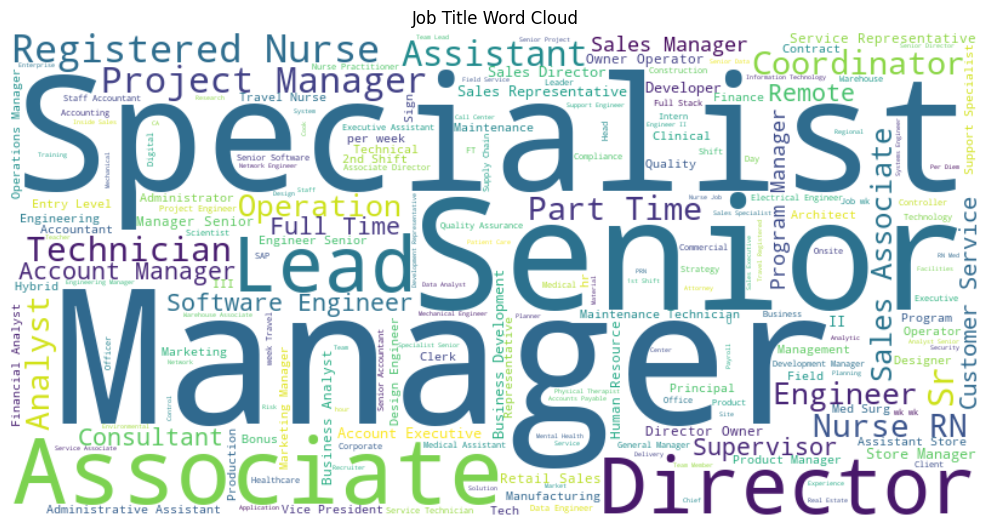

In [50]:
# Visualization 1: Creating a word cloud from job titles
job_titles_text = ' '.join(data['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()